In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

PIMA Diabetes Dataset


In [4]:
data = pd.read_csv('/content/diabetes.csv') 

Data Analysis and Visualization

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

getting the statistical measures of the data

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


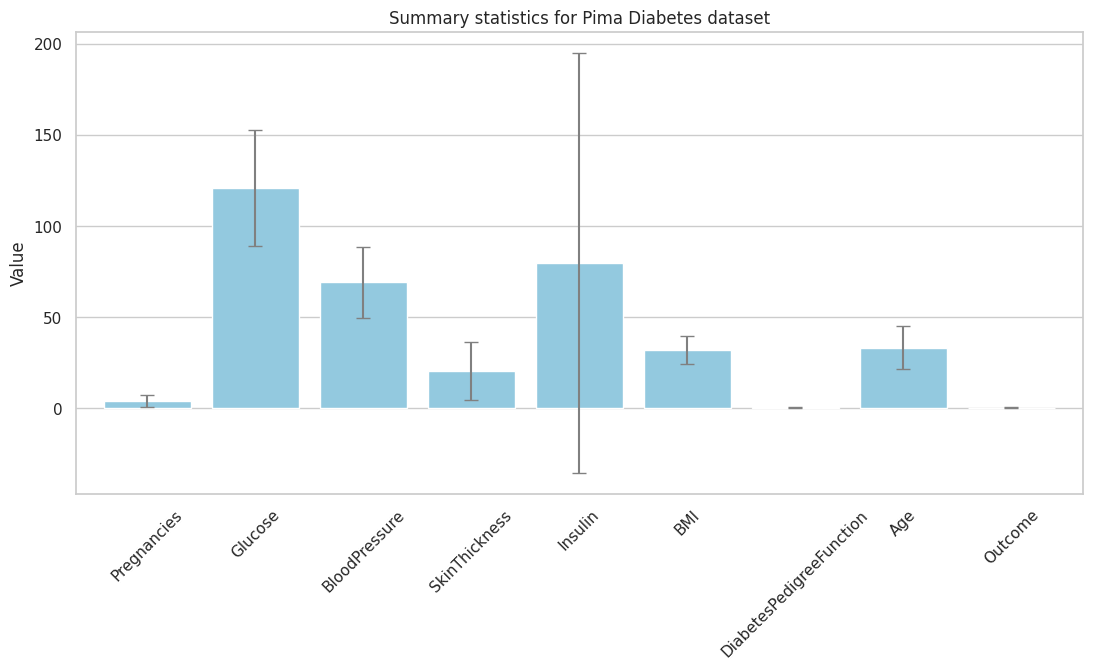

In [31]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

summary_stats = data[numeric_cols].describe().loc[['mean', 'std']].T

sns.set(style='whitegrid')
plt.figure(figsize=(13, 6)) 
ax = sns.barplot(x=summary_stats.index, y='mean', data=summary_stats, color='skyblue')
ax.errorbar(x=summary_stats.index, y=summary_stats['mean'], yerr=summary_stats['std'], fmt='none', ecolor='gray', capsize=5)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # rotate x-axis labels
ax.set_xmargin(0.03)

ax.set_ylabel('Value')
ax.set_title('Summary statistics for Pima Diabetes dataset')

plt.show()



In [33]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

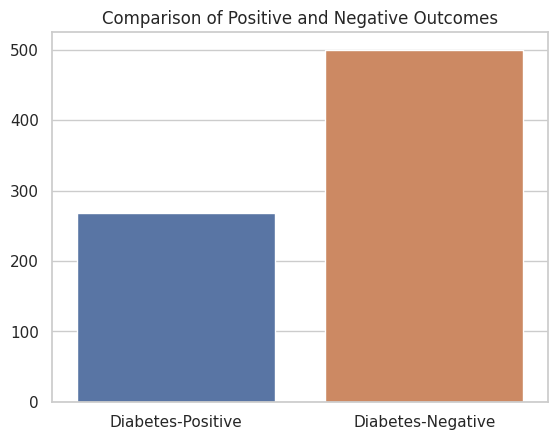

In [36]:
outcome_counts = data['Outcome'].value_counts()

sns.barplot(x=['Diabetes-Positive','Diabetes-Negative'], y=[outcome_counts[1], outcome_counts[0]])
plt.title('Comparison of Positive and Negative Outcomes')


plt.show()

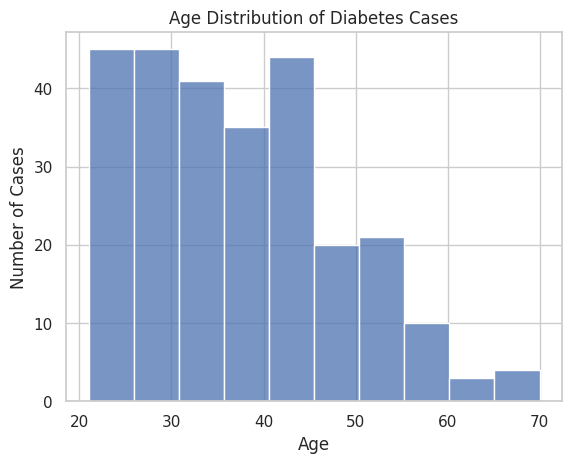

In [38]:
sns.histplot(x='Age', data=data.loc[data['Outcome'] == 1], bins=10)
plt.title('Age Distribution of Diabetes Cases')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.show()

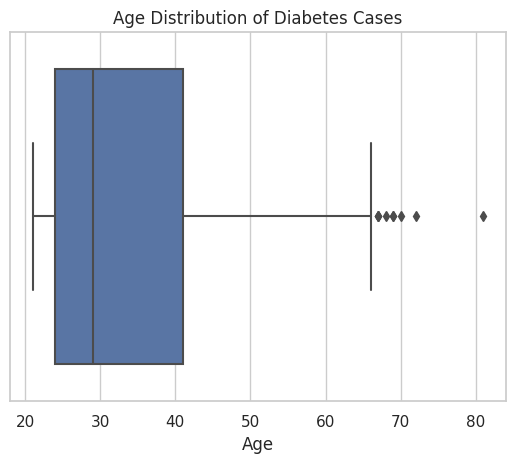

In [42]:
sns.boxplot(x='Age', data=data)
plt.title('Age Distribution of Diabetes Cases')
plt.xlabel('Age')
plt.show()

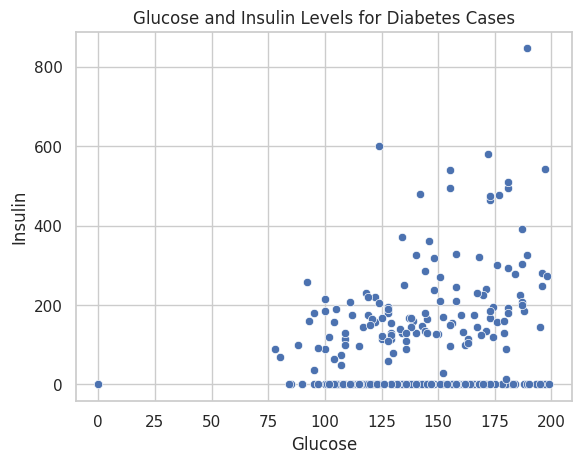

In [40]:
sns.scatterplot(x='Glucose', y='Insulin', data=data.loc[data['Outcome'] == 1])
plt.title('Glucose and Insulin Levels for Diabetes Cases')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()